# Importing packages and libraries

In [88]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string as s
import re
import os
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Load the dataset

In [2]:
cb_data= pd.read_csv('clickbait_data.csv')

In [3]:
cb_data.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


<AxesSubplot:xlabel='clickbait', ylabel='count'>

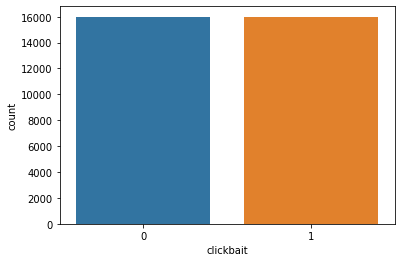

In [4]:
sns.countplot(x = cb_data.clickbait)

# Splitting the data into Train and Test sets

In [5]:
x=cb_data.headline
y=cb_data.clickbait
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=22,stratify=cb_data['clickbait'])

# Analyzing the Train and Test Data

In [6]:
print("No. of elements in training set")
print(train_x.size)
print("No. of elements in testing set")
print(test_x.size)

No. of elements in training set
24000
No. of elements in testing set
8000


In [7]:
print(train_x.head())
print(train_y.head())

16963    California's same-sex marriage ban ruled uncon...
31283    Sports-heavy broadcast day for BBC One receive...
22340    Report says disappearing life threatens biodiv...
24344    UN accuses US of wholesale rights violations i...
2219     5 Ridiculous Things Science Claimed About Bear...
Name: headline, dtype: object
16963    0
31283    0
22340    0
24344    0
2219     1
Name: clickbait, dtype: int64


In [8]:
print(test_x.head())
print(test_y.head())

31858                 Indian Ocean tsunami, one year after
20688    UN carries out first review of US human rights...
19125    Pirate Bay case: Internet group attacks websit...
13523             How Many Iconic '70s Films Have You Seen
3473        How Much Do You Really Know About "Doctor Who"
Name: headline, dtype: object
31858    0
20688    0
19125    0
13523    1
3473     1
Name: clickbait, dtype: int64


# Tokenization of Data

The data is tokenized i.e. split into tokens which are the smallest or minimal meaningful units. The data is split into words.

In [9]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

# Converting to lowercase

The data is converted into lowercase to avoid ambiguity between same words in different cases like 'NLP', 'nlp' or 'Nlp'.

In [10]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)  

# Removing Stopwords

In [11]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords) 

# Removing punctuation

The punctuations are removed to increase the efficiency of the model. They are irrelevant because they provide no added information.

In [12]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations)
test_x=test_x.apply(remove_punctuations)  

# Removing Numbers

In [13]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

# Removing extra spaces

In [14]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_spaces)
test_x=test_x.apply(remove_spaces)

# Analyzing data after preprocessing

After preprocessing the data i.e. after removing punctuation, stopwords, spaces and numbers.

In [15]:
train_x.head()

16963    [californias, samesex, marriage, ban, ruled, u...
31283    [sportsheavy, broadcast, day, bbc, one, receiv...
22340    [report, says, disappearing, life, threatens, ...
24344    [un, accuses, us, wholesale, rights, violation...
2219     [ridiculous, things, science, claimed, bearded...
Name: headline, dtype: object

In [16]:
test_x.head()

31858                  [indian, ocean, tsunami, one, year]
20688    [un, carries, first, review, us, human, rights...
19125    [pirate, bay, case, internet, group, attacks, ...
13523                       [many, iconic, s, films, seen]
3473                     [much, really, know, doctor, who]
Name: headline, dtype: object

# Lemmatization

Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. It involves the morphological analysis of words.

In lemmatization we find the root word or base form of the word rather than just clipping some characters from the end e.g. is, are, am are all converted to its base form be in Lemmatization

Here lemmatization is done using NLTK library.

In [58]:
lemmatizer=WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

In [19]:
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [20]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

# Countvectoriser

This method is used to convert the text into features.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cov=CountVectorizer(analyzer='word', ngram_range=(1,2),max_features=22500)
train_1=cov.fit_transform(train_x)
test_1=cov.transform(test_x)

In [22]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()

In [23]:
pd.DataFrame(test_arr[:100], columns=cov.get_feature_names())

,aaa,aaron,aaron tveit,ab,abandon,abandoned,abbas,abbey,abbott,abby,...,zombie apocalypse,zone,zoo,zoolander,zotob,zotob worm,zuma,zurich,íngrid,íngrid betancourt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Define Naive Bayes Classifier and training

In [24]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

# Evaluation of Result

In [25]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

F1 score of the model
0.9593110334498253
Accuracy of the model
0.95925
Accuracy of the model in percentage
95.92500000000001 %


In [26]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(test_y,pred))

from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_y,pred))

Confusion Matrix
[[3831  169]
 [ 157 3843]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4000
           1       0.96      0.96      0.96      4000

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000



Text(0.5, 1.0, 'Confusion Matrix for Clickbait Classification')

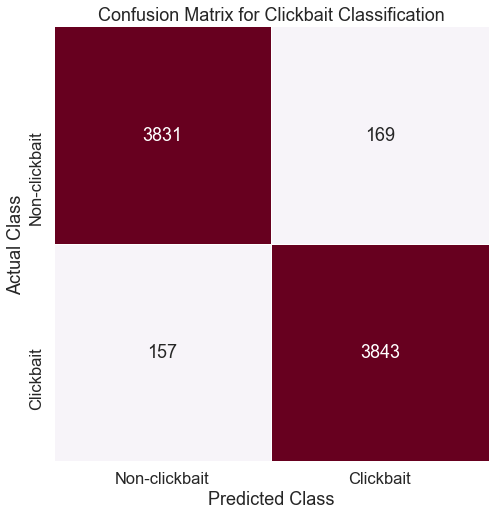

In [27]:
sns.set(font_scale=1.5)
cof=confusion_matrix(test_y, pred)
cof=pd.DataFrame(cof, index=[i for i in range(2)], columns=[i for i in range(2)])
plt.figure(figsize=(8,8))

sns.heatmap(cof, cmap="PuRd",linewidths=1, annot=True,square=True,cbar=False,fmt='d',xticklabels=['Non-clickbait','Clickbait'],yticklabels=['Non-clickbait','Clickbait'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.title("Confusion Matrix for Clickbait Classification")

# SAVING THE MODEL AND SCALER OBJECT FOR USE IN DEPLOYMENT

In [90]:
joblib.dump(cov,"scaler.pkl")

['scaler.pkl']

In [91]:
joblib.dump(NB_MN,"model.pkl")

['model.pkl']

# RE-USABLE PREDICTION CLASS FOR DEPLOYMENT

In [134]:
class ClickBaitModel:
    def __init__(self, text):
        
        '''
        Argument required is a JSON object as retrieved from the POST request
        JSON object = {"title":"string"}
        '''
        
        self.text = text["title"]
        
        
    def tokenization(self):
        lst=self.text.split()
        return lst
    
    
    def lowercasing(self,arg):
        new_lst=[]
        for i in arg:
            i=i.lower()
            new_lst.append(i)
        return new_lst

    
    def remove_stopwords(self, arg):
        stop=stopwords.words('english')
        new_lst=[]
        for i in arg:
            if i not in stop:
                new_lst.append(i)
        return new_lst

    
    def remove_punctuations(self, arg):
        new_lst=[]
        for i in arg:
            for j in s.punctuation:
                i=i.replace(j,'')
            new_lst.append(i)
        return new_lst

    
    def remove_numbers(self, arg):
        nodig_lst=[]
        new_lst=[]
        for i in arg:
            for j in s.digits:    
                i=i.replace(j,'')
            nodig_lst.append(i)
        for i in nodig_lst:
            if i!='':
                new_lst.append(i)
        return new_lst
    
    
    def remove_spaces(self, arg):
        new_lst=[]
        for i in arg:
            i=i.strip()
            new_lst.append(i)
        return new_lst


    
    def lemmatzation(self, arg):
        lemmatizer=nltk.stem.WordNetLemmatizer()
        new_lst=[]
        for i in arg:
            i=lemmatizer.lemmatize(i)
            new_lst.append(i)
        return new_lst
    
    
    def preprocess(self):
        temp = self.tokenization()
        temp = self.lowercasing(temp)
        temp = self.remove_stopwords(temp)
        temp = self.remove_punctuations(temp)
        temp = self.remove_numbers(temp)
        temp = self.remove_spaces(temp) 
        lemmatizer=WordNetLemmatizer()
        temp = self.lemmatzation(temp)
        temp = ''.join(i+' ' for i in temp)
        return temp  
    
    
    def predict(self,scaler,model):
        '''
        Arguments required are the scaler and model objects.
        This function will preprocess the JSON object, and return a prediction as a string.
        '''
        temp = self.preprocess()
        temp = scaler.transform([temp])
        temp_arr=temp.toarray()
        pred=model.predict(temp_arr)[0]
        return "Clickbait!" if pred == 1 else "Not Clickbait!"
    
    


# CODE FOR DEPLOYMENT

In [ ]:
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string as s
import re
import os
import joblib


loaded_model = joblib.load("###PATH###/model.pkl")
loaded_scaler = joblib.load("###PATH###/scaler.pkl")


title_data = ClickBaitModel(###ENTERPOSTREQUEST.BODY)
title_data.predict(loaded_scaler, loaded_model)

# SINGLE PREDICTION TEST BEFORE MOVING CODE TO DEPLOYMENT

In [139]:
cb_data.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [137]:
dummy = ClickBaitModel({"title": "Which TV Female Friend Group Do You Belong In"})

In [138]:
dummy.predict(loaded_scaler,loaded_model)

'Clickbait!'